# Telecom Customer Churn
This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [2]:
import pandas as pd
churn = pd.read_csv("data/customer_churn.csv")
print(churn.shape)
churn.head(100)

(3150, 14)


,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,0,19,2,6453,144,90,44,2,2,1,25,701.865,0
96,15,0,17,1,8993,174,78,42,5,1,1,55,254.505,0
97,11,0,18,4,2913,48,36,21,3,1,1,30,262.440,0
98,5,0,11,2,4450,43,220,12,3,1,1,30,1059.720,0


## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

[Source](https://www.kaggle.com/royjafari/customer-churn)  of dataset and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description. 

**Citation**: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which age groups send more SMS messages than make phone calls?
- 📊 **Visualize**: Create a plot visualizing the number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).
- 🔎 **Analyze**: Are there significant differences between the length of phone calls between different tariff plans?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired by a telecom company. A competitor has recently entered the market and is offering an attractive plan to new customers. The telecom company is worried that this competitor may start attracting its customers.

You have access to a dataset of the company's customers, including whether customers churned. The telecom company wants to know whether you can use this data to predict whether a customer will churn. They also want to know what factors increase the probability that a customer churns.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

1. 🗺️ Explore: Which age groups send more SMS messages than make phone calls?

In [9]:
sms_over_calls = churn[churn['Frequency of SMS'] > churn['Frequency of use']].sort_values(by='Frequency of SMS', ascending=False)
sms_over_calls

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
2663,9,0,41,3,3515,39,522,14,4,1,1,45,1393.850,0
563,4,0,39,2,3210,33,515,12,4,1,1,45,1368.575,0
2563,13,0,40,4,4000,43,511,25,4,1,1,45,1378.575,0
1613,0,0,37,1,2905,27,508,10,3,1,1,30,2149.280,0
2363,14,0,46,3,3660,43,505,16,4,1,1,45,1355.075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,0,0,35,0,0,0,2,0,2,1,2,25,9.000,1
1728,0,0,34,0,0,0,2,0,3,1,2,30,8.000,1
1868,0,0,40,0,0,0,1,0,2,1,2,25,4.500,1
1918,0,0,36,0,0,0,1,0,2,1,2,25,4.500,1


In [21]:
# Age groups that send more total SMS messages than make total phone calls.
age_group_sms_over_calls_by_total = sms_over_calls.groupby('Age Group')['Frequency of SMS'].sum()
age_group_sms_over_calls_by_total

Age Group
2     60770
3    111479
4     10723
5       693
Name: Frequency of SMS, dtype: int64

In [29]:
age_group_sms_over_calls_by_total.sort_values(ascending = False, inplace=True)
age_group_sms_over_calls_by_total

Age Group
3    111479
2     60770
4     10723
5       693
Name: Frequency of SMS, dtype: int64

In [26]:
print(f"The age group that sends more total SMS than make total phone calls is age group {age_group_sms_over_calls_by_total.index[0]}.")

The age group that sends more total SMS than make total phone calls is age group 3.


In [27]:
# Age groups that send more average SMS messages than make average phone calls.
age_group_sms_over_calls_by_mean = sms_over_calls.groupby('Age Group')['Frequency of SMS'].mean()
age_group_sms_over_calls_by_mean

Age Group
2    176.144928
3    221.188492
4     83.773438
5     19.250000
Name: Frequency of SMS, dtype: float64

In [30]:
age_group_sms_over_calls_by_mean.sort_values(ascending = False, inplace=True)
age_group_sms_over_calls_by_mean

Age Group
3    221.188492
2    176.144928
4     83.773438
5     19.250000
Name: Frequency of SMS, dtype: float64

In [31]:
print(f"The age group that sends more average SMS than make average phone calls is age group {age_group_sms_over_calls_by_mean.index[0]}.")

The age group that sends more average SMS than make average phone calls is age group 3.


2. 📊 Visualize: Create a plot visualizing the number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating bins for the duration of calls
bins = [0, 1800, 3600, np.inf] # 0s-1800s (30 mins): short, 1800s-3600s (30mins to 1hr): medium, >300s (longer than 1 hr): long
labels =['short', 'medium', 'long']

# Label the phone duration according to the bins and labels
churn['Call Duration'] = pd.cut(churn['Seconds of Use'], bins = bins, labels = labels, right = True)
churn.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,Call Duration
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0,long
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,short
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0,medium
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0,long
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,medium


In [39]:
# Counting the number of calls per age group
call_counts_by_age_group = pd.pivot_table(
    data = churn, 
    index = 'Age Group', # rows
    columns = 'Call Duration', # columns
    values = 'Seconds of Use', # counting only according to the call duration (short, medium, or long)
    aggfunc = 'count', # count the number of calls
    fill_value = 0 # replace NaN values with 0
)
call_counts_by_age_group

Call Duration,short,medium,long
Age Group,,,
1,6,36,81
2,333,182,440
3,294,509,595
4,151,75,139
5,43,13,99


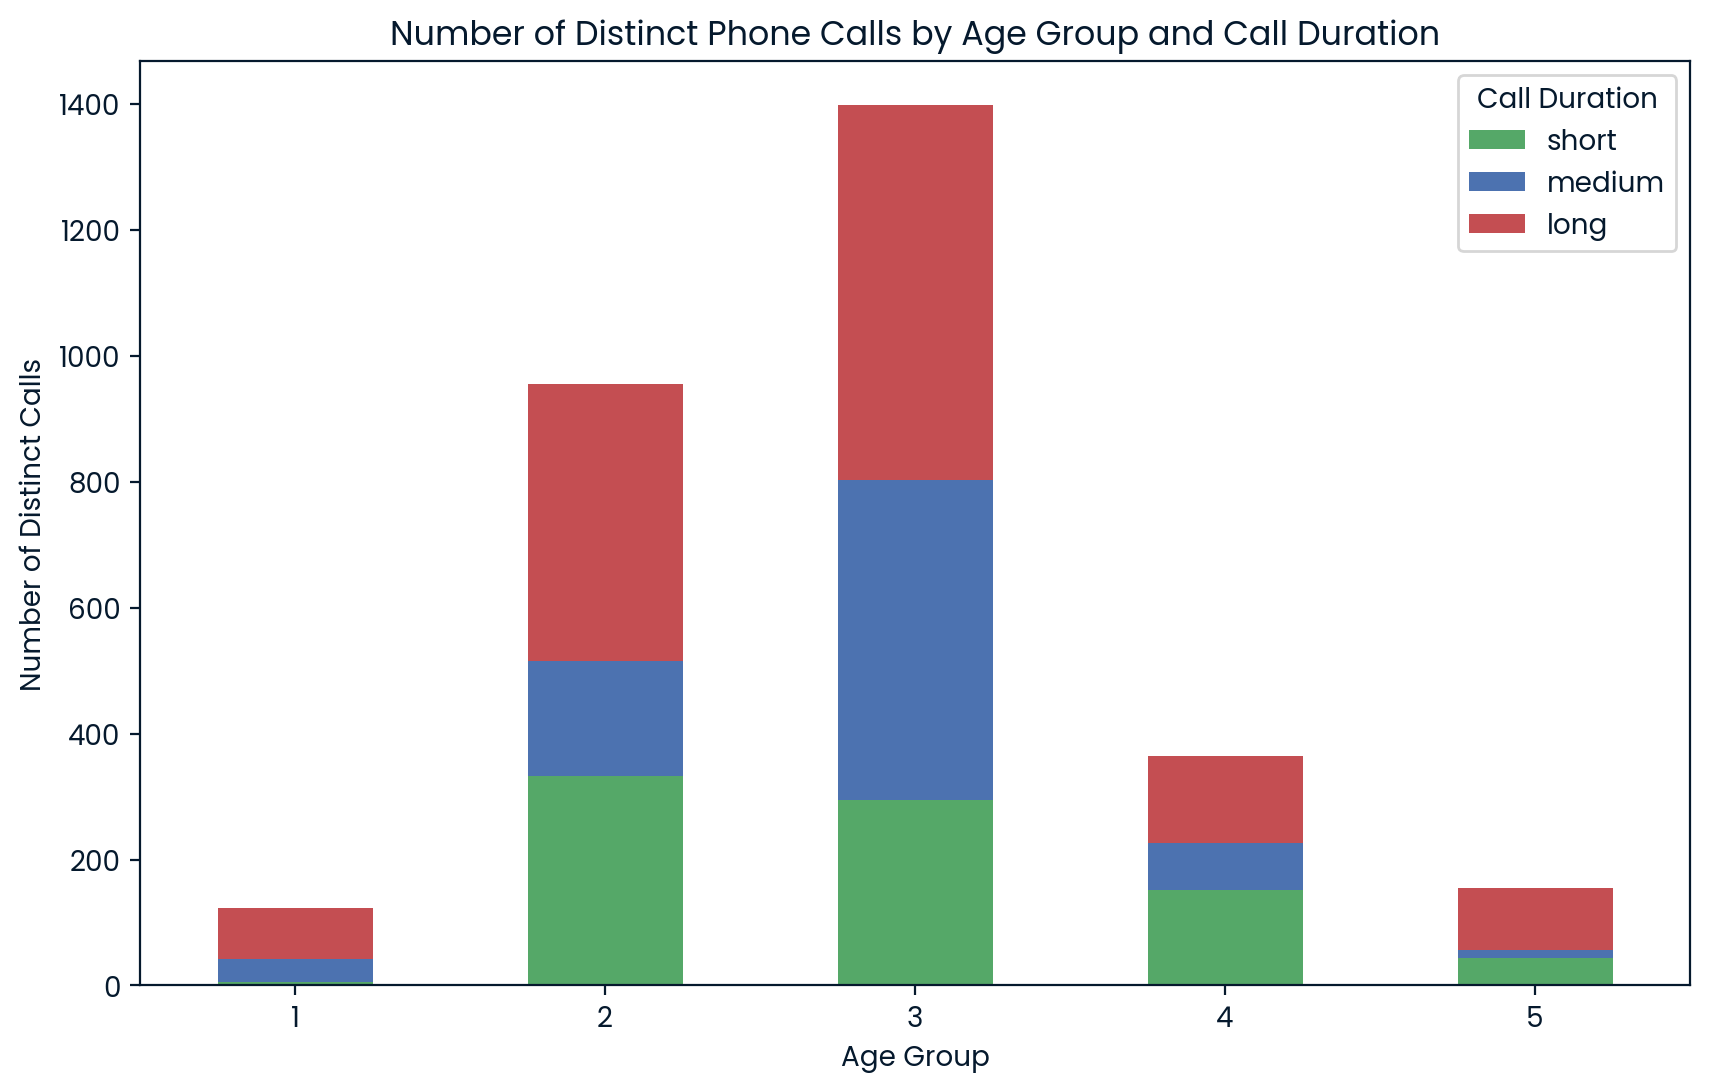

In [42]:
call_counts_by_age_group.plot(kind='bar', stacked=True, figsize=(10,6), color=['#55a868', '#4c72b0', '#c44e52'])

plt.title('Number of Distinct Phone Calls by Age Group and Call Duration')
plt.xlabel('Age Group')
plt.ylabel('Number of Distinct Calls')
plt.legend(title='Call Duration')
plt.xticks(rotation=0)
plt.show()

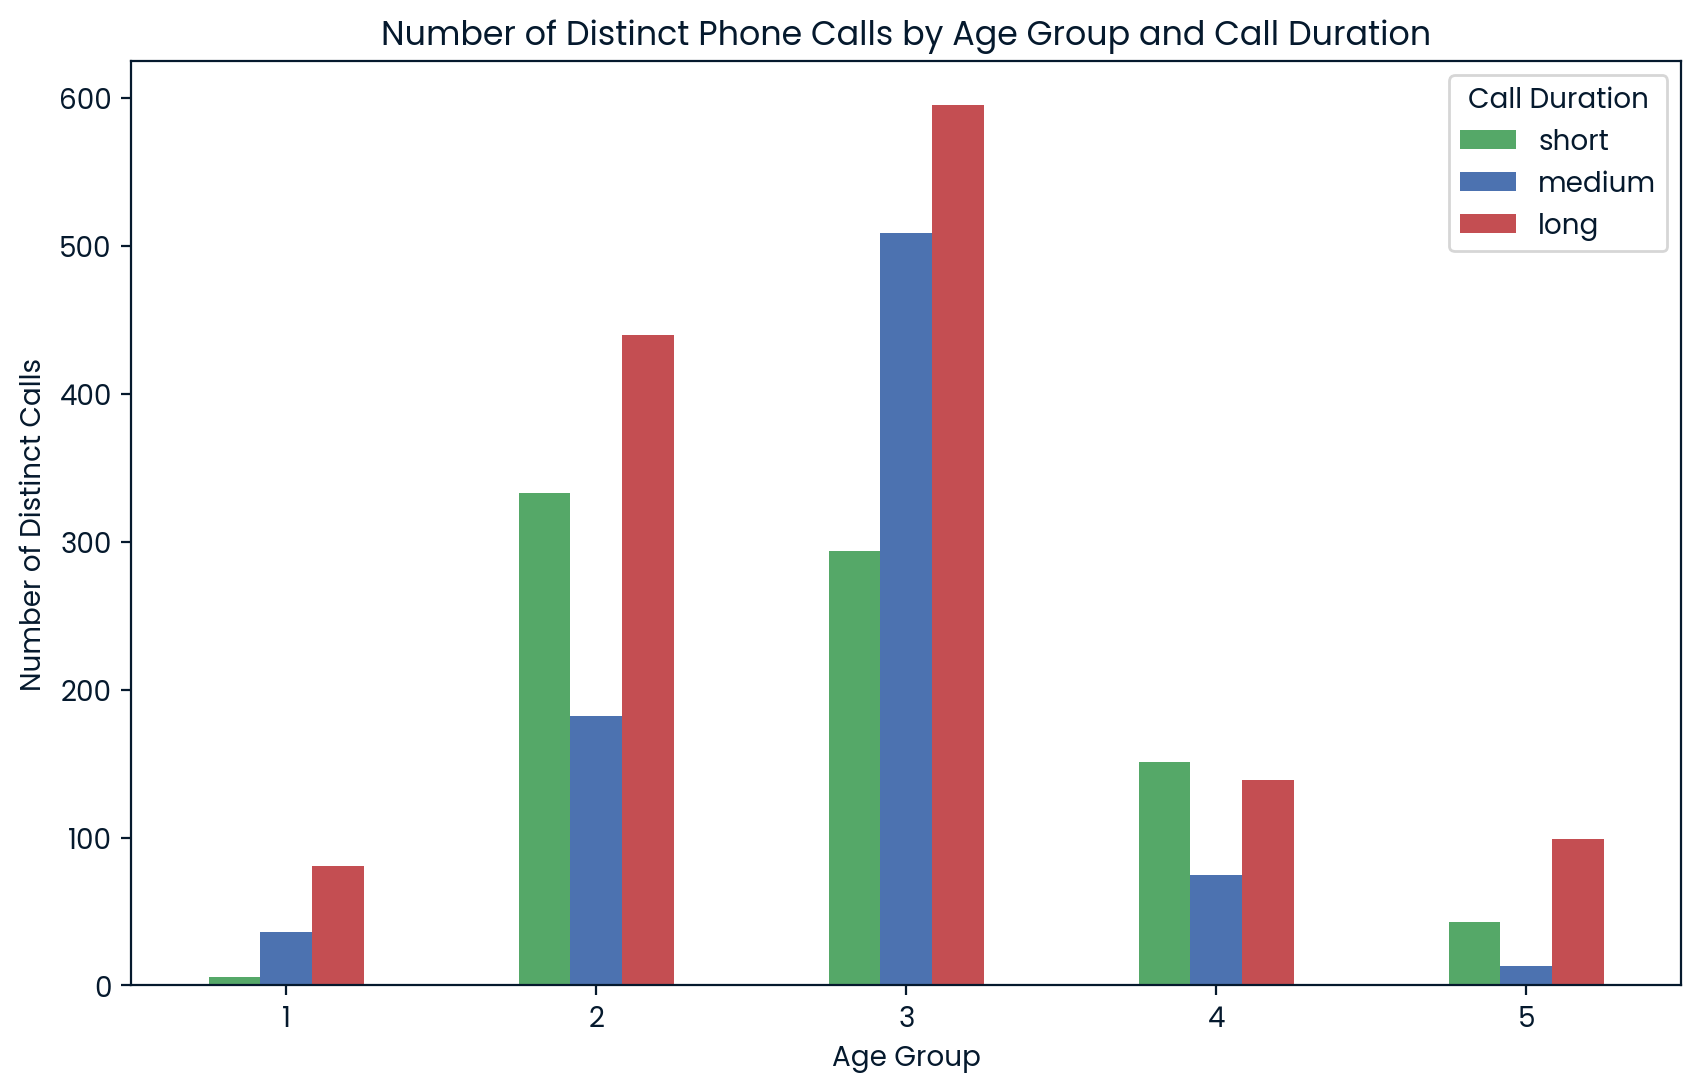

In [45]:
call_counts_by_age_group.plot(kind='bar', stacked=False, figsize=(10,6), color=['#55a868', '#4c72b0', '#c44e52'])
plt.title('Number of Distinct Phone Calls by Age Group and Call Duration')
plt.xlabel('Age Group')
plt.ylabel('Number of Distinct Calls')
plt.legend(title='Call Duration')
plt.xticks(rotation=0)
plt.show()

3. 🔎 Analyze: Are there significant differences between the length of phone calls between different tariff plans?

In [46]:
# Get summary statistics of Seconds of Use by Tarrif Plan 
churn.groupby('Tariff Plan')['Seconds of Use'].describe()

,count,mean,std,min,25%,50%,75%,max
Tariff Plan,,,,,,,,
1,2905.0,4309.620998,4153.870563,0.0,1360.0,2858.0,6123.0,16785.0
2,245.0,6403.261224,4244.181070,300.0,2025.0,6560.0,7270.0,17090.0


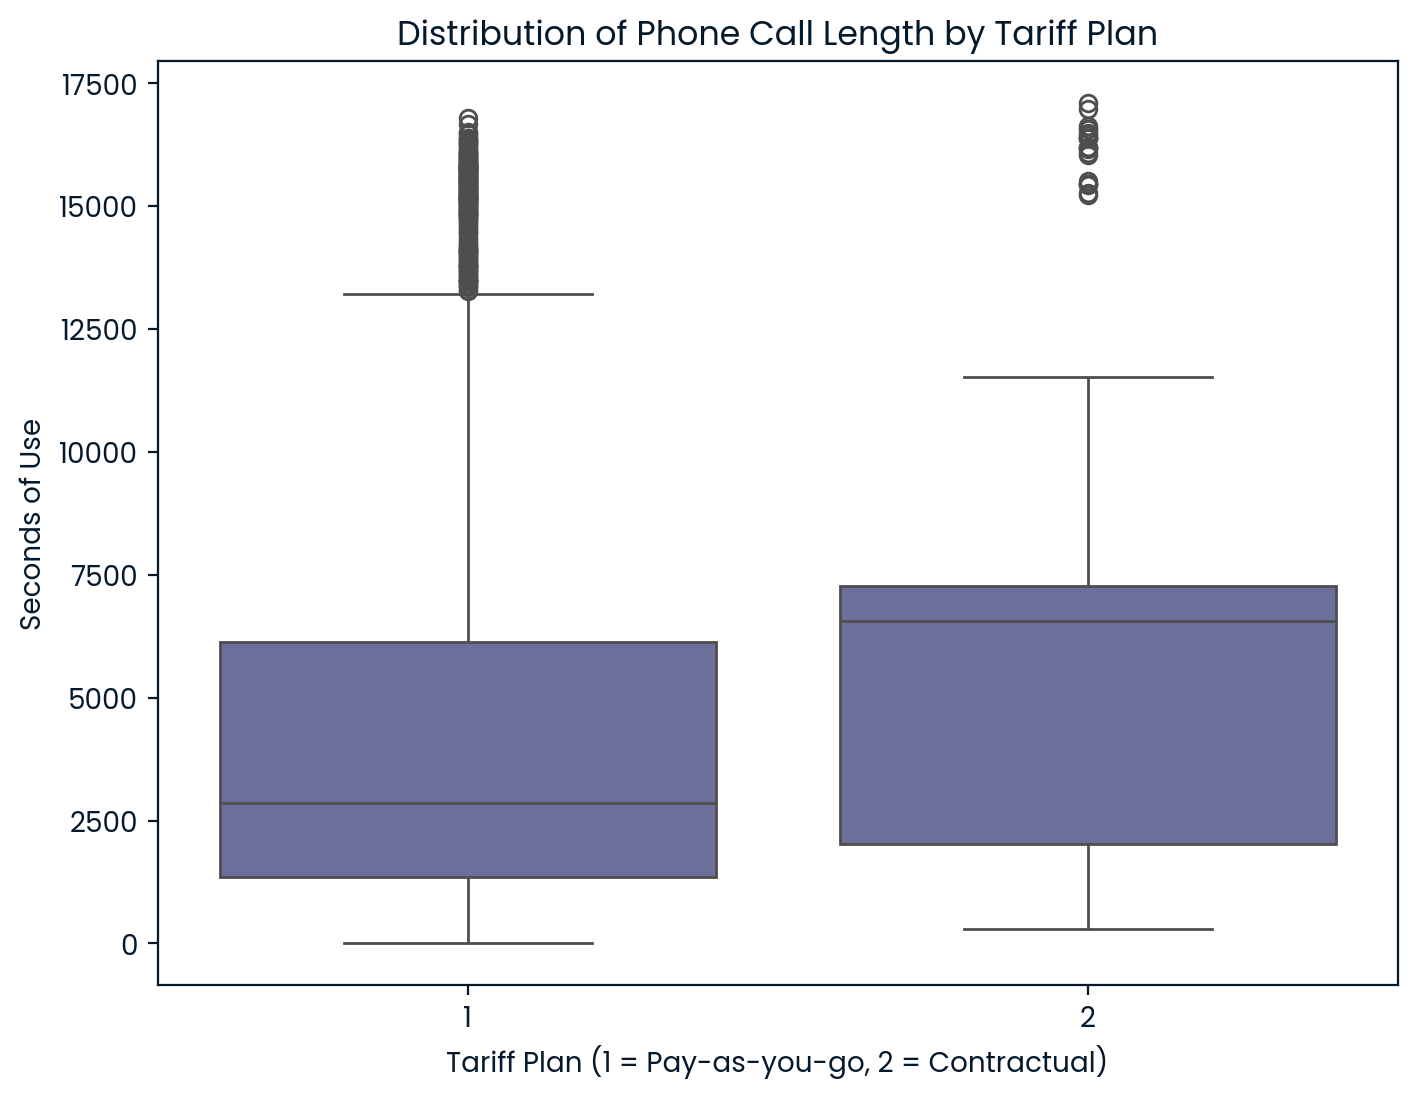

In [47]:
# Using boxplots to visualize the distributions
plt.figure(figsize=(8,6))
sns.boxplot(x='Tariff Plan', y='Seconds of Use', data=churn)
plt.title('Distribution of Phone Call Length by Tariff Plan')
plt.xlabel('Tariff Plan (1 = Pay-as-you-go, 2 = Contractual)')
plt.ylabel('Seconds of Use')
plt.show()

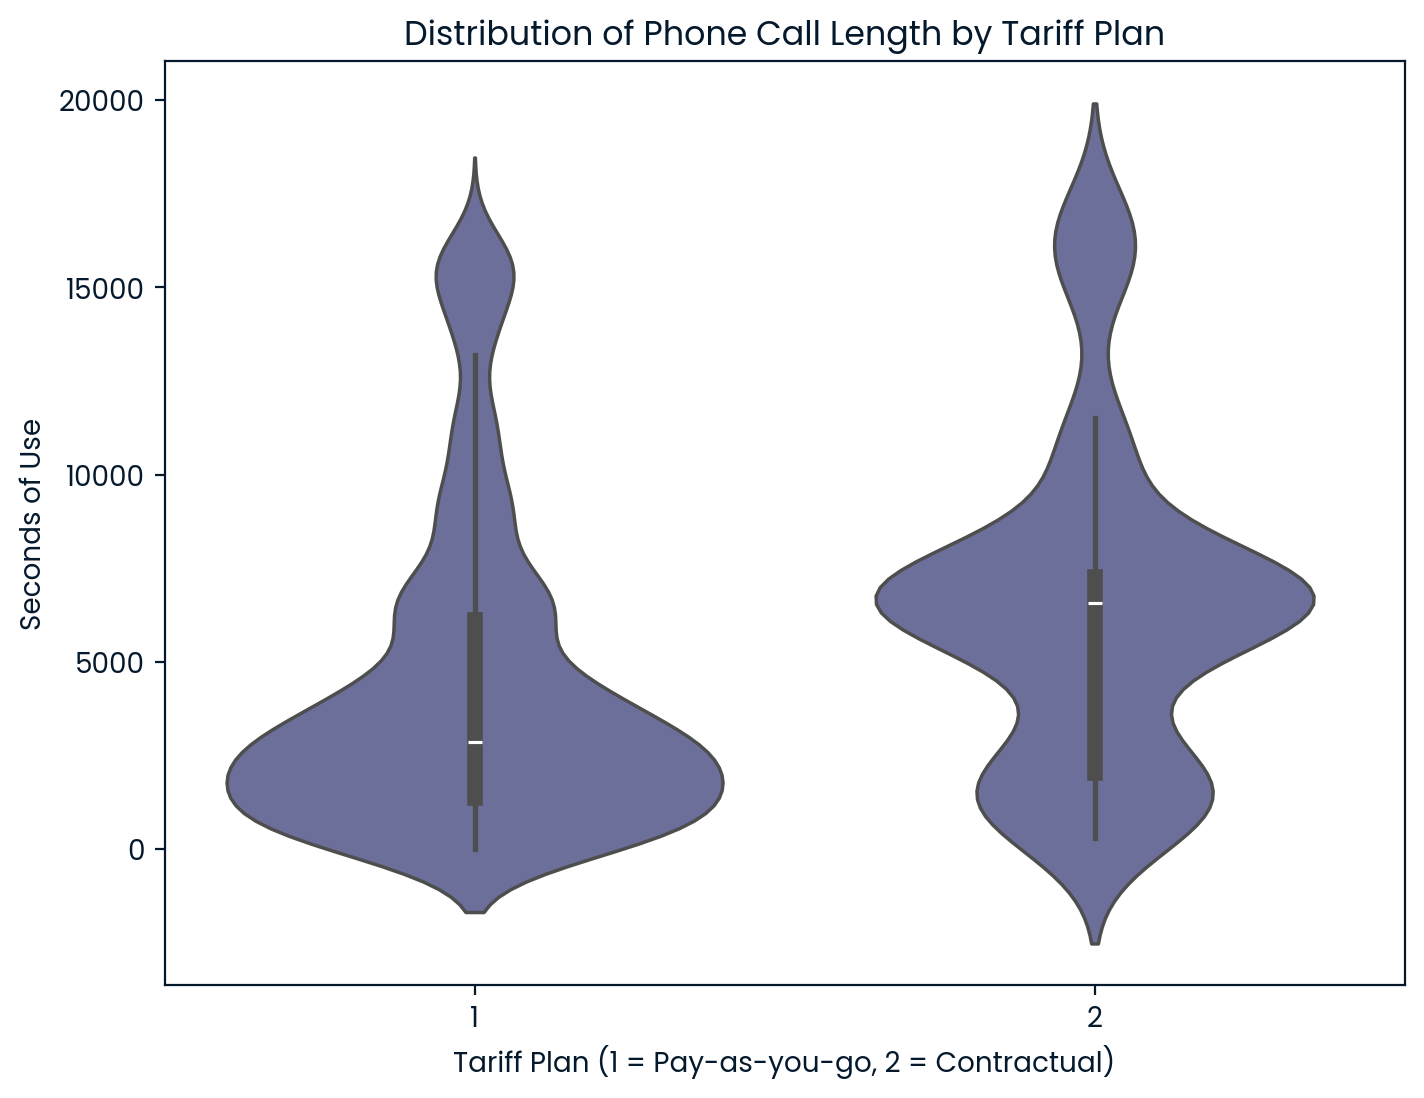

In [48]:
# Using violin plos for visualization of full distributions
plt.figure(figsize=(8,6))
sns.violinplot(x='Tariff Plan', y='Seconds of Use', data=churn)
plt.title('Distribution of Phone Call Length by Tariff Plan')
plt.xlabel('Tariff Plan (1 = Pay-as-you-go, 2 = Contractual)')
plt.ylabel('Seconds of Use')
plt.show()

In [50]:
# Statistical test for significance
from scipy.stats import ttest_ind

plan1 = churn[churn['Tariff Plan']==1]['Seconds of Use']
plan2 = churn[churn['Tariff Plan']==2]['Seconds of Use']

t_stat, p_value = ttest_ind(plan1, plan2, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat}, P-value: {p_value}") 
# p-value < 0.05 → significant difference, p-value ≥ 0.05 → no significant difference

T-statistic: -7.427134077129253, P-value: 1.2949013976051755e-12


P-value < 0.05, hence there is significant difference.

In [52]:
# Since Seconds of Use has a lot of outliers based from the boxplots, try Mann-Whitney U test
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(plan1, plan2, alternative='two-sided')
print(f"U-statistic: {u_stat}, P-value: {p_value}")
# p-value < 0.05 → significant difference, p-value ≥ 0.05 → no significant difference

U-statistic: 238142.0, P-value: 7.201453544708868e-18


P-value < 0.05, still there is significant difference.

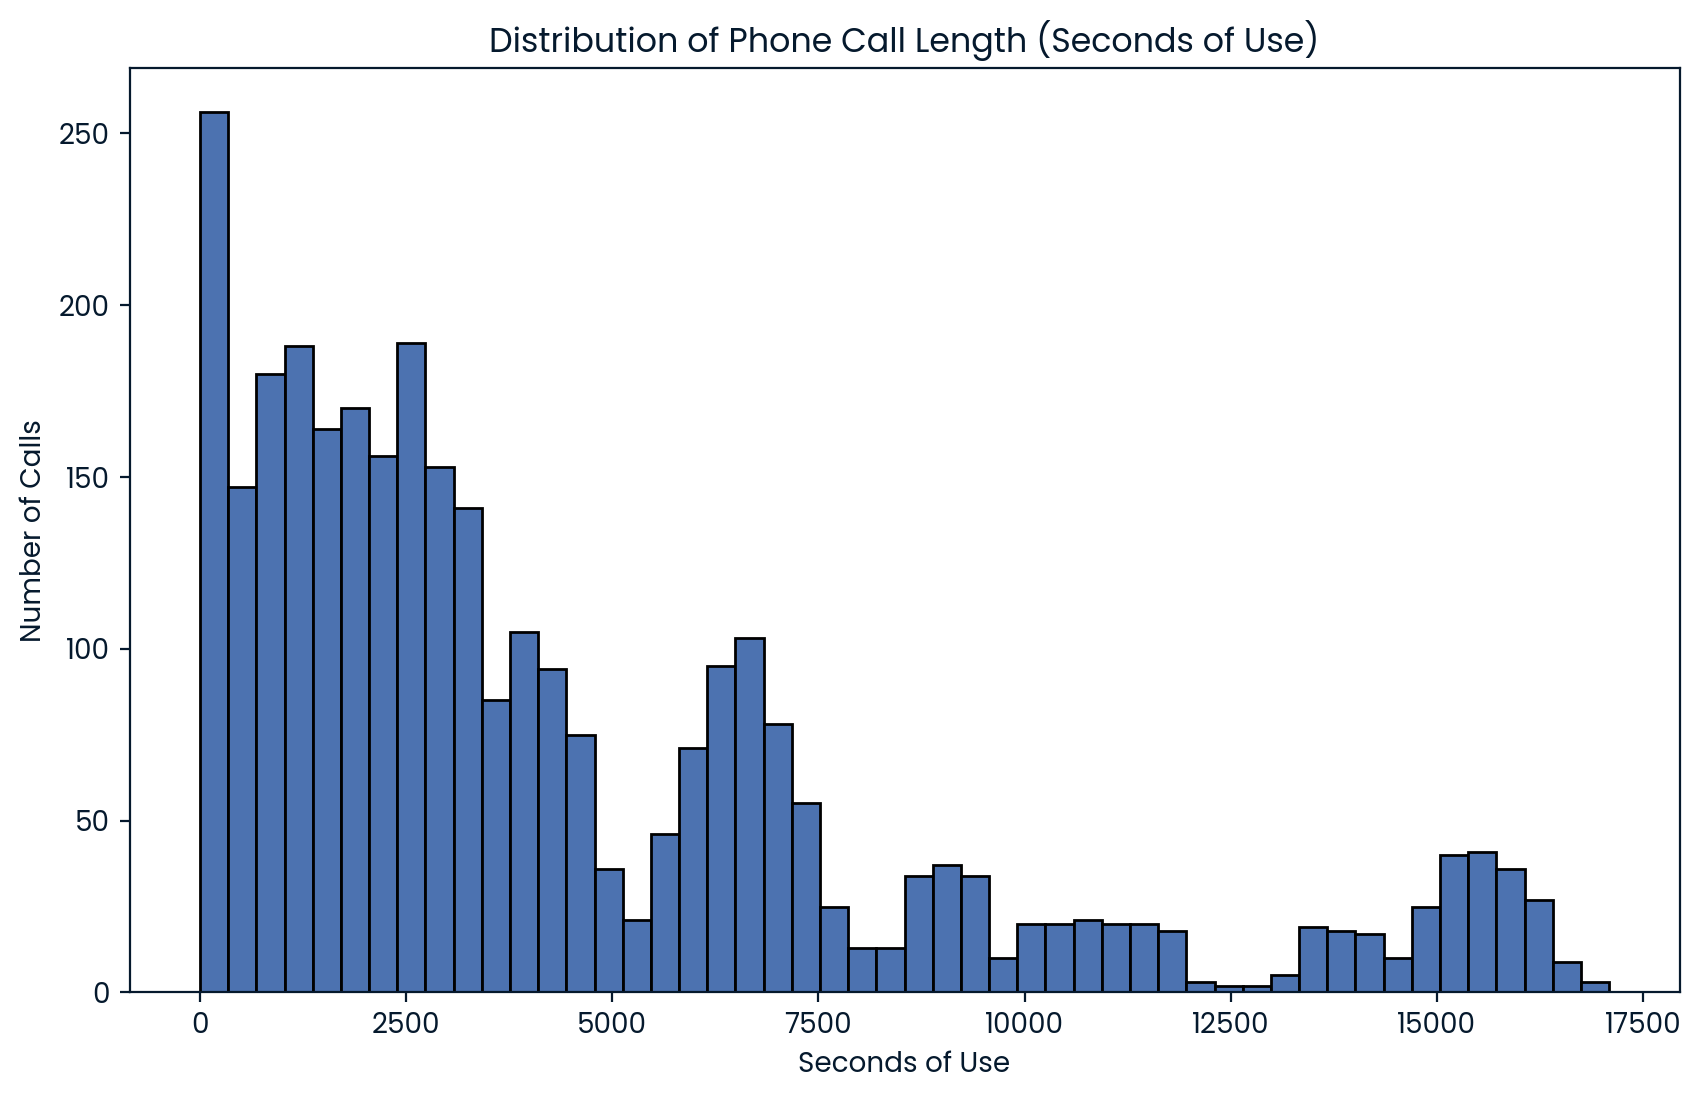

In [54]:
# Visualizing the distributions of Seconds of Use
plt.figure(figsize=(10,6))
plt.hist(churn['Seconds of Use'], bins=50, color='#4c72b0', edgecolor='black')
plt.title('Distribution of Phone Call Length (Seconds of Use)')
plt.xlabel('Seconds of Use')
plt.ylabel('Number of Calls')
plt.show()

Since the distribution of Seconds of Use is skewed and has many outliers, do sqrt-transformation to normalize it.

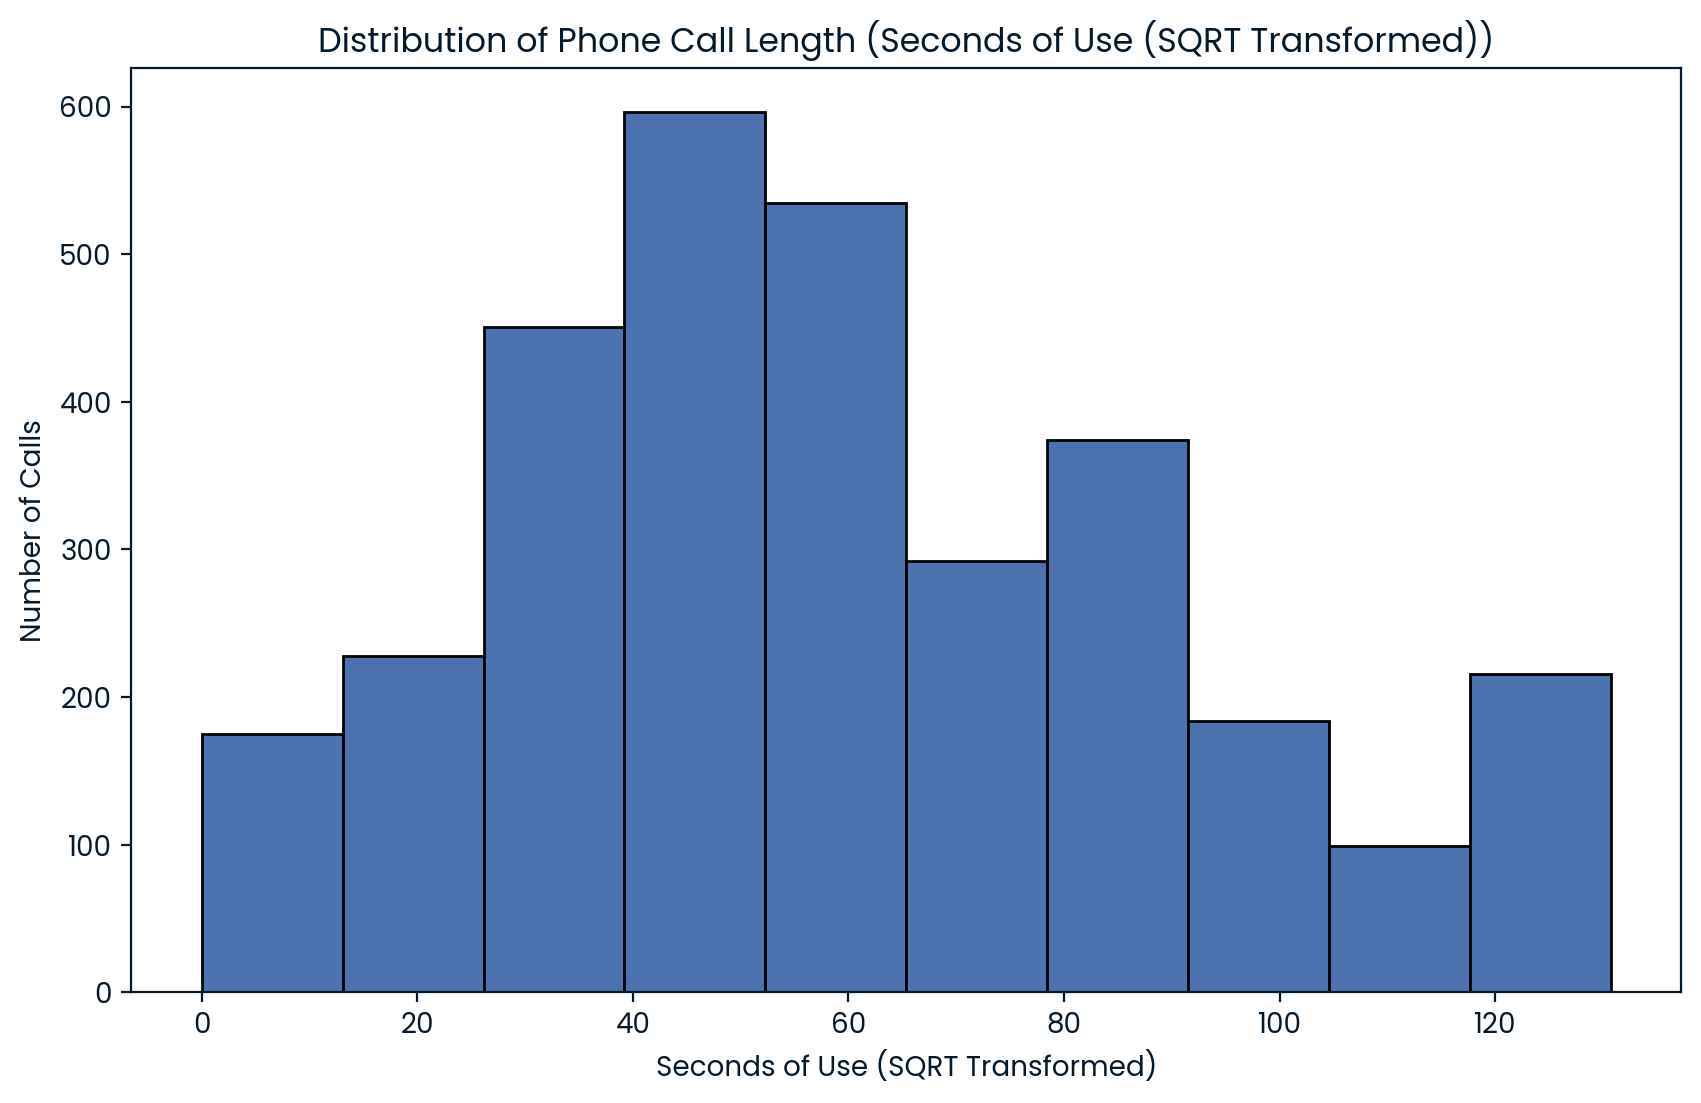

In [58]:
churn['Seconds of Use (SQRT Transformed)'] = np.sqrt(churn['Seconds of Use'])

plt.figure(figsize=(10,6))
plt.hist(churn['Seconds of Use (SQRT Transformed)'], color='#4c72b0', edgecolor='black')
plt.title('Distribution of Phone Call Length (Seconds of Use (SQRT Transformed))')
plt.xlabel('Seconds of Use (SQRT Transformed)')
plt.ylabel('Number of Calls')
plt.show()

Now that the seconds of use normal, visualize it again using boxplot and violin plot for distributions.

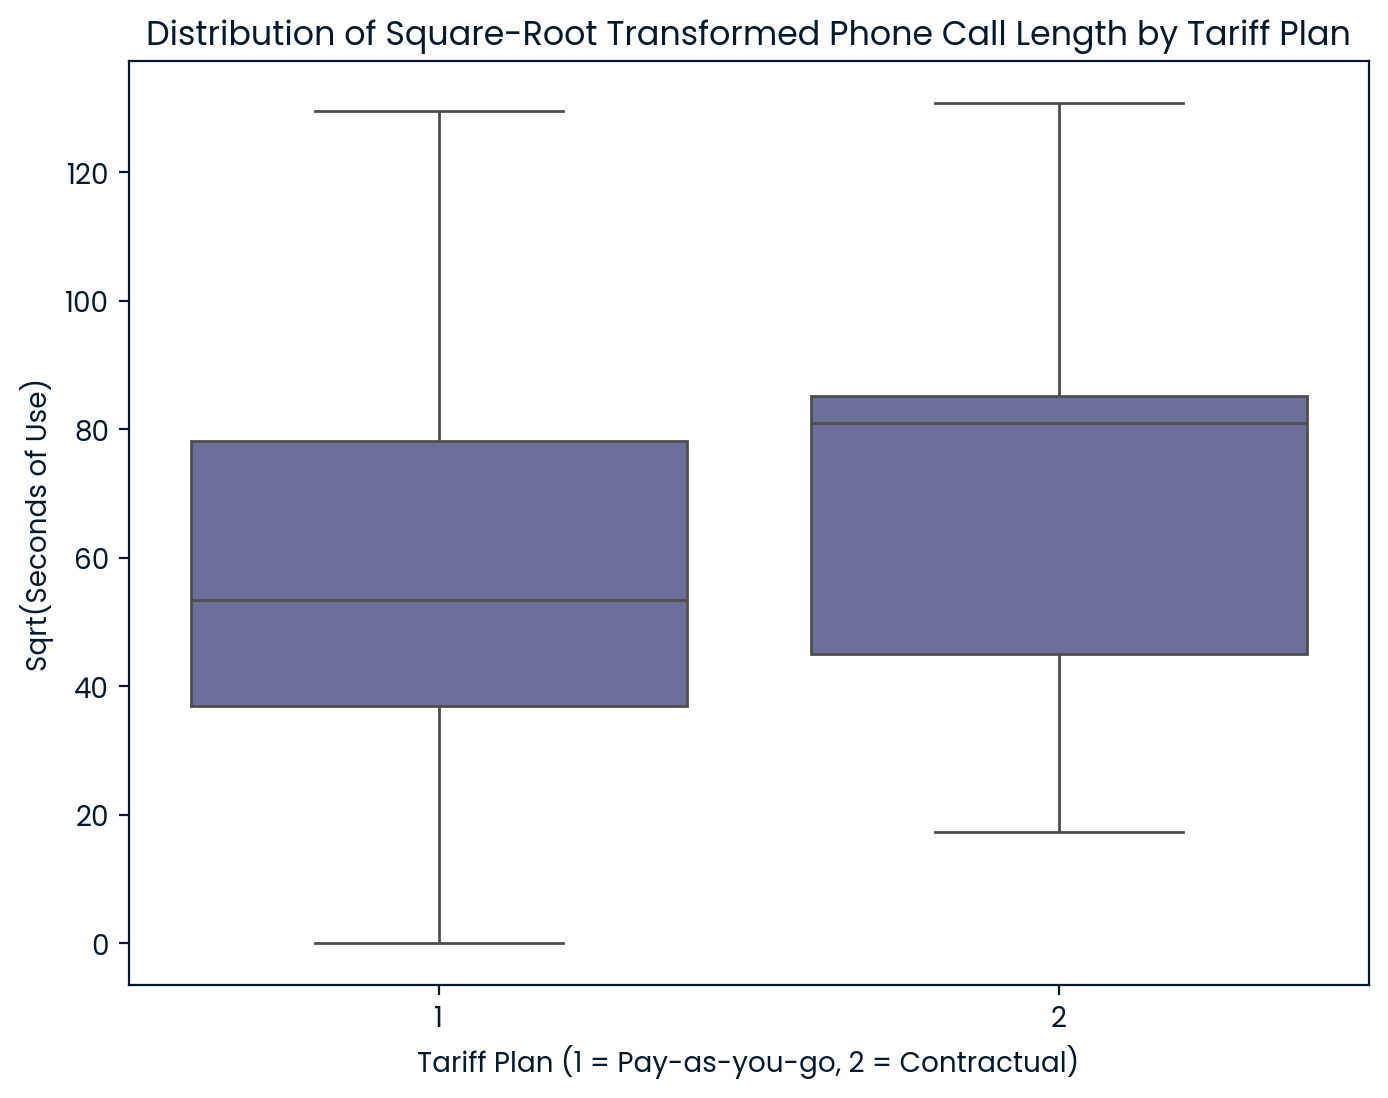

In [59]:
# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Tariff Plan', y='Seconds of Use (SQRT Transformed)', data=churn)
plt.title('Distribution of Square-Root Transformed Phone Call Length by Tariff Plan')
plt.xlabel('Tariff Plan (1 = Pay-as-you-go, 2 = Contractual)')
plt.ylabel('Sqrt(Seconds of Use)')
plt.show()

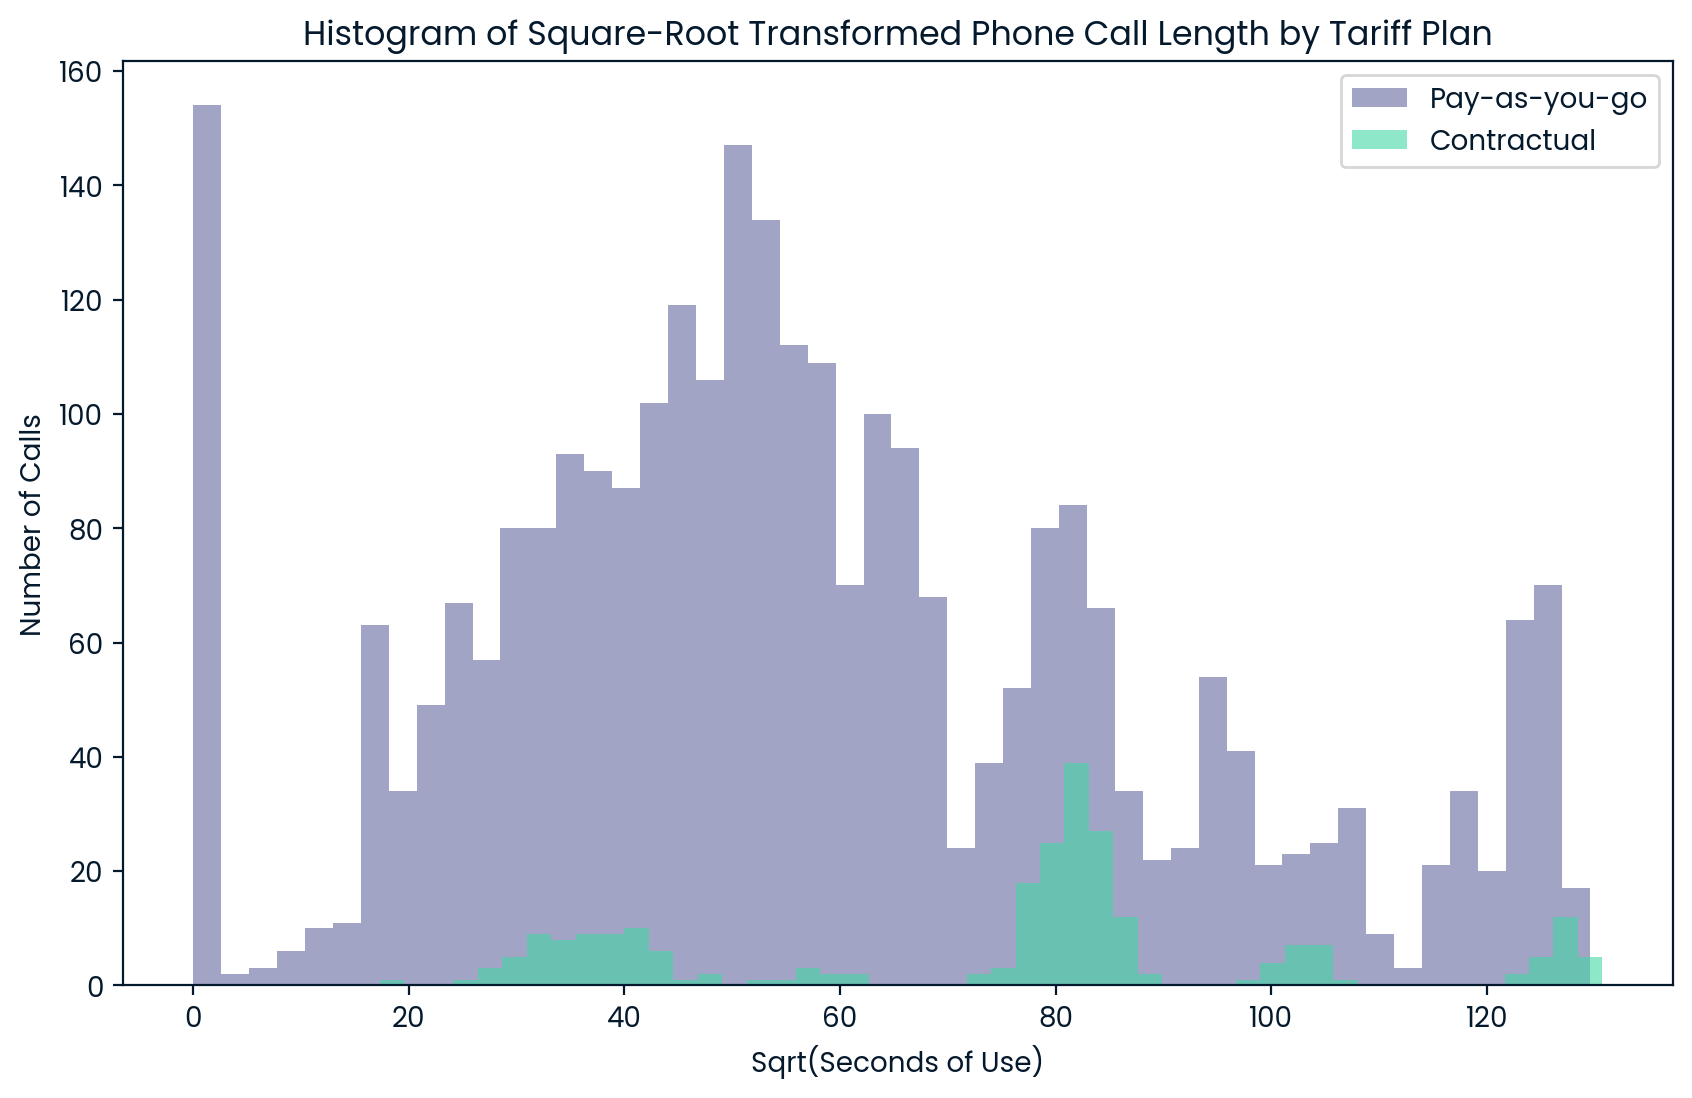

In [60]:
plt.figure(figsize=(10,6))
plt.hist(churn[churn['Tariff Plan']==1]['Seconds of Use (SQRT Transformed)'], bins=50, alpha=0.6, label='Pay-as-you-go')
plt.hist(churn[churn['Tariff Plan']==2]['Seconds of Use (SQRT Transformed)'], bins=50, alpha=0.6, label='Contractual')
plt.xlabel('Sqrt(Seconds of Use)')
plt.ylabel('Number of Calls')
plt.title('Histogram of Square-Root Transformed Phone Call Length by Tariff Plan')
plt.legend()
plt.show()

Apply statistical testing again for significance.

In [64]:
plan1 = churn[churn['Tariff Plan']==1]['Seconds of Use (SQRT Transformed)']
plan2 = churn[churn['Tariff Plan']==2]['Seconds of Use (SQRT Transformed)']

t_stat, p_value = ttest_ind(plan1, plan2, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value}")
# p-value < 0.05 → significant difference, p-value ≥ 0.05 → no significant difference

T-statistic: -9.26, P-value: 4.079122726846634e-18


P-value < 0.05, hence there is significant difference.

Either way (sqrt-transformed or not), the p-value is always < 0.05. In fact, it's always almost zero.
That tiny p-value means the difference in mean call lengths between the tariff plans is highly significant.
The null hypothesis (“no difference in means”) is rejected.

In [65]:
# Print out the difference of their means.

mean1 = np.mean(plan1)
mean2 = np.mean(plan2)
effect_size = mean2 - mean1
print(f"Mean difference (Contractual - Pay-as-you-go): {effect_size:.2f} seconds")

Mean difference (Contractual - Pay-as-you-go): 17.27 seconds
